### Mass calibration
"open_fragger.params" file modified: 
- calibrate_mass = 2 --> Perform mass calibration (0 for OFF, 1 for ON, 2 for ON and find optimal parameters).
- write_calibrated_mgf = 1 --> Write calibrated MS2 scan to a MGF file (0 for No and 1 for writing MGF file).

Then run: java -Xmx16g -jar MSFragger-3.4.jar open_fragger.params < input file path >


#### Command line output

*********************MASS CALIBRATION AND PARAMETER OPTIMIZATION*******************
-----|---------------|---------------|---------------|---------------
     |  MS1   (Old)  |  MS1   (New)  |  MS2   (Old)  |  MS2   (New)  
-----|---------------|---------------|---------------|---------------
 Run |  Median  MAD  |  Median  MAD  |  Median  MAD  |  Median  MAD  
 001 |   4.81   1.18 |  -0.04   0.69 |   4.30   2.43 |   0.26   2.16  
-----|---------------|---------------|---------------|---------------
Finding the optimal parameters:
-------|-------|-------|-------|-------|-------|-------|-------|-------
  MS2  |    5  |    7  |   10  |   15  |   20  |   25  |   30  |   50  
-------|-------|-------|-------|-------|-------|-------|-------|-------
 Count |  12442|  13563|  14594|  15858|  16849|  17523|  18096|  19469
-------|-------|-------|-------|-------|-------|-------|-------|-------
-------|-------|-------|-------|-------|-------|-------
 Peaks | 300_0 | 200_0 | 175_0 | 150_1 | 125_1 | 100_1 
-------|-------|-------|-------|-------|-------|-------
 Count |  19908|  19891|  19880|  19705| skip rest
-------|-------|-------|-------|-------|-------|-------
-------|-------
 Int.  |    1  
-------|-------
 Count |  19883
-------|-------
-------|-------
 Rm P. |    0  
-------|-------
 Count |  19978
-------|-------
New fragment_mass_tolerance = 50 PPM
New use_topN_peaks = 175
New minimum_ratio = 0.000000
New intensity_transform = 1
New remove_precursor_peak = 0
New precursor_true_tolerance = 4.000000 PPM (tie breaker)
************MASS CALIBRATION AND PARAMETER OPTIMIZATION DONE IN 2.797 MIN*********


In [1]:
from pyteomics import mgf
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
def plot_spectrum_from_reader(spectrum, title):
    y = spectrum["intensity array"]
    x = spectrum["m/z array"]
    zipped = list(zip(x, y))
    df = pd.DataFrame(zipped, columns=['m/z', 'Intensity'])
    plt.stem('m/z', 'Intensity', data=df, basefmt="C2", linefmt='black', label= "m/z values")
    plt.ylabel('Intensity')
    plt.xlabel('m/z')
    plt.title(title)
    plt.xticks(x[[0,-1]],x[[0,-1]])
    plt.show()

Number of spectra: 27161


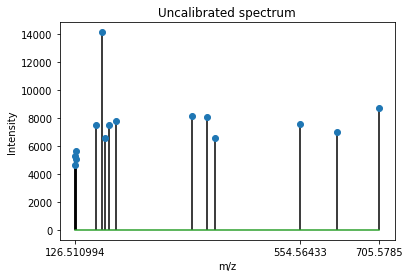

In [36]:
reader = mgf.read('MSfragger_outputs/2021-5-21_Otter_v9_uncalibrated.mgf')
for spectrum in reader[0:1]: #read the first uncalibrated spectrum 
    print("Number of spectra:", len(reader))
    plot_spectrum_from_reader(spectrum, "Uncalibrated spectrum")

Number of spectra: 26843


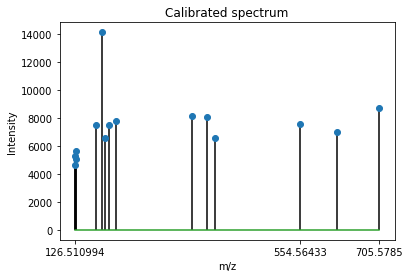

In [37]:
reader = mgf.read('MSfragger_outputs/2021-5-21_Otter_v9_calibrated.mgf')
for spectrum in reader[0:1]: #read the first calibrated spectrum 
    print("Number of spectra:", len(reader))
    plot_spectrum_from_reader(spectrum, "Calibrated spectrum")

There is no calibration... Neither in spectrum number 2,3,4. But from that one, spectrum intensities don't match.

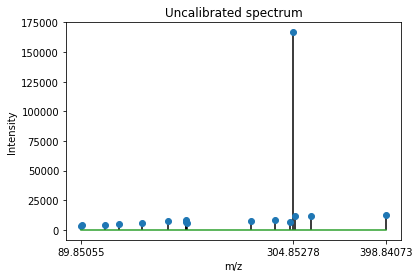

In [38]:
reader = mgf.read('MSfragger_outputs/2021-5-21_Otter_v9_uncalibrated.mgf')
for spectrum in reader[3:4]: #read the first uncalibrated spectrum 
    plot_spectrum_from_reader(spectrum, "Uncalibrated spectrum")

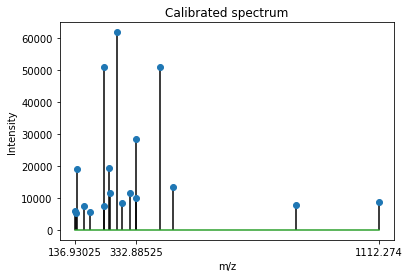

In [39]:
reader = mgf.read('MSfragger_outputs/2021-5-21_Otter_v9_calibrated.mgf')
for spectrum in reader[3:4]: #read the first uncalibrated spectrum 
    plot_spectrum_from_reader(spectrum, "Calibrated spectrum")

As it didn't worked well, "open_fragger.params" file modified to:

- calibrate_mass = 2
- minimum_ratio = 0

Number of spectra: 27161


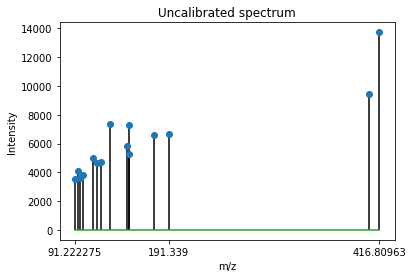

In [40]:
reader = mgf.read('MSfragger_outputs/2021-5-21_Otter_v9_uncalibrated.mgf')
for spectrum in reader[1:2]: #read the first uncalibrated spectrum 
    print("Number of spectra:", len(reader))
    plot_spectrum_from_reader(spectrum, "Uncalibrated spectrum")

Number of spectra: 26846


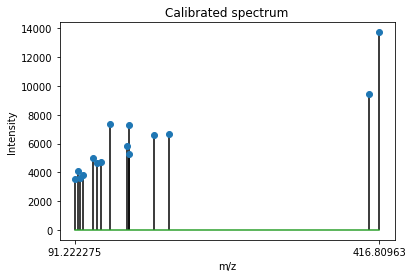

In [55]:
reader = mgf.read('MSfragger_outputs/2021-5-21_Otter_v9_calibrated_masscab2_minimratio0.mgf')
for spectrum in reader[1:2]: 
    print("Number of spectra:", len(reader))
    plot_spectrum_from_reader(spectrum, "Calibrated spectrum")

As it didn't worked well, "open_fragger.params" file modified to:

- calibrate_mass = 2
- minimum_ratio = 0
- minimum_peaks = 1       # Minimum number of peaks in experimental spectrum for matching. (before was set to 15)

Number of spectra: 28447
Precursor m/z = 741.1995239257812


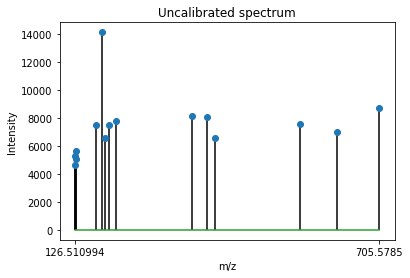

In [60]:
reader = mgf.read('2021-5-21_Otter_v9_uncalibrated.mgf')
print("Number of spectra:", len(reader))
for spectrum in reader[5:6]: #read the first uncalibrated spectrum 
    print("Precursor m/z =", spectrum["params"]["pepmass"][0])
    plot_spectrum_from_reader(spectrum, "Uncalibrated spectrum")

Number of spectra: 28447
Precursor m/z = 741.199507057659


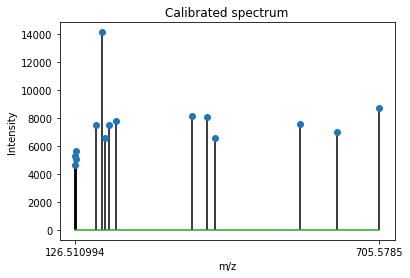

In [61]:
reader = mgf.read('2021-5-21_Otter_v9_calibrated.mgf')
print("Number of spectra:", len(reader))
for spectrum in reader[5:6]: 
    print("Precursor m/z =", spectrum["params"]["pepmass"][0])
    plot_spectrum_from_reader(spectrum, "Calibrated spectrum")

Setting minimum_peaks = 1, there is the same number in calibrated and uncalibrated files, but I don't see any shift of the m/z values of fragment. I think it only calibrates the m/z from the precursor ion. 

### Reading pepXML with pyteomics

In [38]:
from pyteomics import pepxml

In [39]:
reader = pepxml.read('2021-5-21_Otter_v9.pepXML')
for psm in reader[0:1]:
    print(psm)

{'uncalibrated_precursor_neutral_mass': '807.3624', 'assumed_charge': 2, 'spectrum': '2021-5-21_Otter_v9.2515.2515.2', 'precursor_neutral_mass': 807.3575, 'retention_time_sec': 1235.4607772827148, 'start_scan': 2515, 'end_scan': 2515, 'index': 5, 'search_hit': [{'peptide': 'PPSCTSK', 'num_missed_cleavages': 0, 'num_tot_proteins': 1, 'tot_num_ions': 12, 'hit_rank': 1, 'num_matched_ions': 6, 'search_score': {'hyperscore': 14.029, 'nextscore': 14.014, 'expect': 0.3691655}, 'ptm_result': {'localization': '5_6', 'best_score_with_ptm': '14.029991', 'score_without_ptm': '7.1125097', 'localization_peptide': 'PPSCtsK', 'second_best_score_with_ptm': '12.294039', 'ptm_mass': '32.00403'}, 'modified_peptide': 'PPSC[160]TSK', 'massdiff': 32.0040283203125, 'calc_neutral_pep_mass': 775.35345, 'is_rejected': False, 'proteins': [{'protein': 'tr|A0A2Y9JYN6|A0A2Y9JYN6_ENHLU', 'protein_descr': 'plakophilin-1 OS=Enhydra lutris kenyoni OX=391180 GN=LOC111151134 PE=3 SV=1', 'peptide_prev_aa': 'R', 'peptide_ne